In [3]:
import networkx as nx
import matplotlib.pyplot as plt 
import pandas as pd
from typing import Tuple

In [4]:
vertices = pd.read_csv('./data/vertices.csv', index_col=None)
vertices.head()

,~id,name:String
0,v0,Container
1,v1,Hashable
2,v2,Iterable
3,v3,Iterator
4,v4,Reversible


In [5]:
edges_df = pd.read_csv("./data/edges.csv", index_col=None)
edges_df.head()

,~id,~from,~to,~label
0,e0,v3,v2,extends
1,e1,v4,v2,extends
2,e2,v5,v3,extends
3,e3,v8,v6,extends
4,e4,v8,v2,extends


In [6]:
def pairing(row: pd.Series) -> Tuple[str, str]:
    return (row['~from'], row['~to'])

edges_df['pair'] = edges_df.apply(pairing, axis=1)
edges_df.head()

,~id,~from,~to,~label,pair
0,e0,v3,v2,extends,"(v3, v2)"
1,e1,v4,v2,extends,"(v4, v2)"
2,e2,v5,v3,extends,"(v5, v3)"
3,e3,v8,v6,extends,"(v8, v6)"
4,e4,v8,v2,extends,"(v8, v2)"


## DiGraph 

In [7]:
G = nx.DiGraph()
G.add_nodes_from(vertices['~id'])
G.add_edges_from(edges_df.pair)

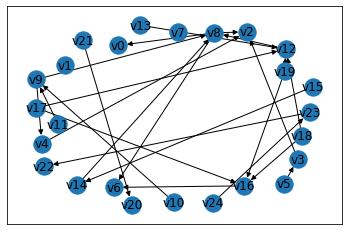

In [8]:
pos = nx.drawing.layout.spring_layout(G, 10)
nx.draw_networkx(G, pos)

In [9]:
res = nx.eigenvector_centrality_numpy(G)
nx.function.density(G)

0.04

In [10]:
print(nx.function.info(G))

Name: 
Type: DiGraph
Number of nodes: 25
Number of edges: 24
Average in degree:   0.9600
Average out degree:   0.9600


In [11]:
nx.cluster.average_clustering(G)

0.0

In [31]:
degree = nx.degree_centrality(G)
# closeness = nx.closeness_centrality(G)
between = nx.betweenness_centrality(G)
page_rank = nx.algorithms.pagerank_numpy(G)
df = pd.DataFrame.from_records([degree, between, page_rank], index=['degree', 'betweenness', 'pagerank']).T
df.head()

,degree,betweenness,pagerank
v0,0.041667,0.000000,0.053615
v1,0.000000,0.000000,0.019103
v2,0.125000,0.000000,0.118524
v3,0.083333,0.001812,0.035341
v4,0.083333,0.002717,0.041024


In [34]:
df = pd.merge(left=df, right=vertices, left_index=True, right_on='~id').drop('~id', axis=1).set_index('name:String')
df.head()

,degree,betweenness,pagerank
name:String,,,
Container,0.041667,0.000000,0.053615
Hashable,0.000000,0.000000,0.019103
Iterable,0.125000,0.000000,0.118524
Iterator,0.083333,0.001812,0.035341
Reversible,0.083333,0.002717,0.041024


In [35]:
print(df.head().to_markdown())

| name:String   |    degree |   betweenness |   pagerank |
|:--------------|----------:|--------------:|-----------:|
| Container     | 0.0416667 |    0          |  0.0536147 |
| Hashable      | 0         |    0          |  0.019103  |
| Iterable      | 0.125     |    0          |  0.118524  |
| Iterator      | 0.0833333 |    0.00181159 |  0.0353406 |
| Reversible    | 0.0833333 |    0.00271739 |  0.0410238 |


In [20]:
df.sort_values('degree', ascending=False).head()

,degree,betweeness,pagerank
name:String,,,
Collection,0.250000,0.046196,0.121806
Set,0.208333,0.023551,0.059697
MappingView,0.166667,0.005435,0.043459
Sequence,0.166667,0.018116,0.051578
Iterable,0.125000,0.000000,0.118524


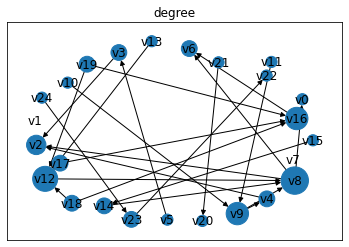

In [21]:
vertices_size = [(v*100)*30 for (k, v) in degree.items()]
pos = nx.drawing.layout.spring_layout(G, 10)
nx.draw_networkx(G, pos, node_size=vertices_size)
plt.title('degree')
plt.savefig("./out/ipynb/degree.png")
plt.show()

In [37]:
df.sort_values('betweenness', ascending=False).head()

,degree,betweenness,pagerank
name:String,,,
Collection,0.250000,0.046196,0.121806
Set,0.208333,0.023551,0.059697
Sequence,0.166667,0.018116,0.051578
Mapping,0.083333,0.007246,0.035341
MappingView,0.166667,0.005435,0.043459


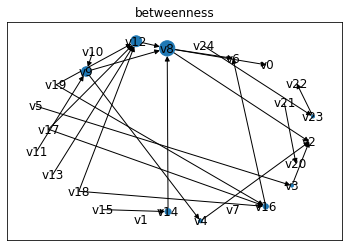

In [38]:
vertices_size = [(v*100)*50 for (k, v) in between.items()]
pos = nx.drawing.layout.spring_layout(G, 10)
nx.draw_networkx(G, pos, node_size=vertices_size)
plt.title('betweenness')
plt.savefig("./out/ipynb/betweenness.png")
plt.show()

In [39]:
df.sort_values('pagerank', ascending=False).head()

,degree,betweenness,pagerank
name:String,,,
Collection,0.250000,0.046196,0.121806
Iterable,0.125000,0.000000,0.118524
Sized,0.083333,0.000000,0.090555
Set,0.208333,0.023551,0.059697
Container,0.041667,0.000000,0.053615


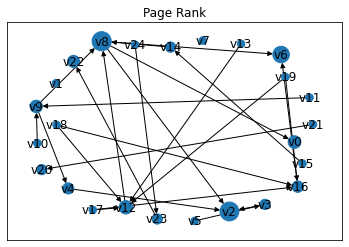

In [40]:
vertices_size = [(v*100)*30 for (k, v) in page_rank.items()]
pos = nx.drawing.layout.spring_layout(G, 10)
nx.draw_networkx(G, pos, node_size=vertices_size)
plt.title('Page Rank')
plt.savefig("./out/ipynb/page_rank.png")
plt.show()

In [41]:
df.sort_values('pagerank', ascending=False).head()

,degree,betweenness,pagerank
name:String,,,
Collection,0.250000,0.046196,0.121806
Iterable,0.125000,0.000000,0.118524
Sized,0.083333,0.000000,0.090555
Set,0.208333,0.023551,0.059697
Container,0.041667,0.000000,0.053615


In [46]:
rank_df = df.rank(ascending=False).sum(axis=1).sort_values().to_frame()
rank_df.columns = ['Sum of rank value']
print(rank_df.head().to_markdown())

| name:String   |   Sum of rank value |
|:--------------|--------------------:|
| Collection    |                 3   |
| Set           |                 8   |
| Sequence      |                12.5 |
| MappingView   |                16.5 |
| Mapping       |                23.5 |


In [44]:
rank_df = df.rank(ascending=False).mean(axis=1).sort_values().to_frame()
rank_df.columns = ['Sum of rank value']
rank_df.head()

,Sum of rank value
name:String,
Collection,1.000000
Set,2.666667
Sequence,4.166667
MappingView,5.500000
Mapping,7.833333
